In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")


## Reading and Understanding the DataSet

In [76]:
df = pd.read_csv('heart_v2.csv')
df.shape

(270, 5)

In [77]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [78]:
df.tail()

,age,sex,BP,cholestrol,heart disease
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0
269,67,1,160,286,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [80]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


##  Data Visualization

<AxesSubplot:>

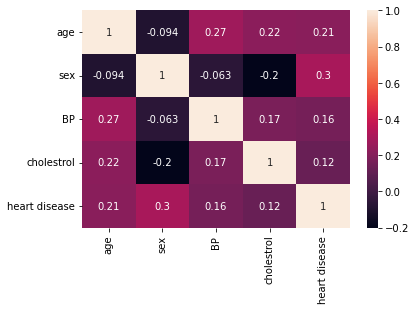

In [81]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

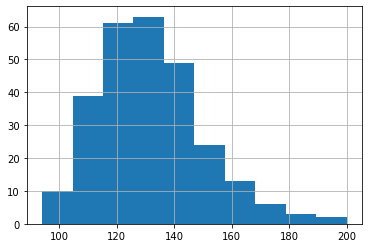

In [82]:
df.BP.hist()

<AxesSubplot:>

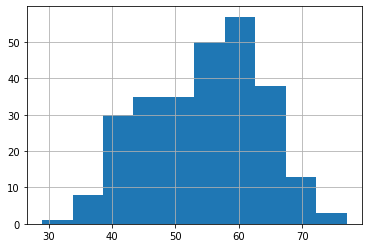

In [83]:
df.age.hist()

<AxesSubplot:>

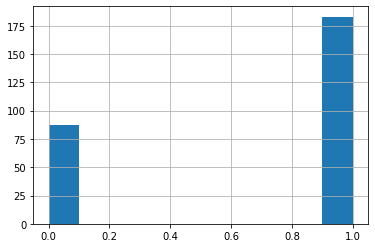

In [84]:
df.sex.hist()

<AxesSubplot:>

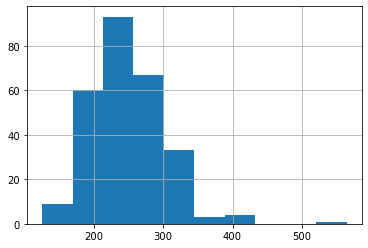

In [85]:
df.cholestrol.hist()

<AxesSubplot:>

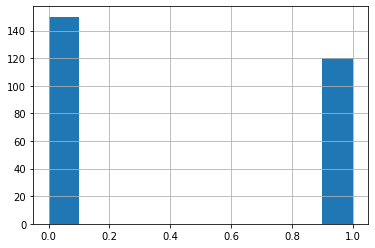

In [86]:
df['heart disease'].hist()

## Splitting the data into train and test set

In [87]:
import sklearn
from sklearn.model_selection import train_test_split 

In [88]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100
                                     )


In [89]:
# creating X_train and y_train 
y_train = df_train.pop('heart disease')
X_train = df_train 
# creating X_test and y_test 
y_test = df_test.pop('heart disease')
X_test = df_test

In [90]:
X_train.head()

,age,sex,BP,cholestrol
55,41,0,105,198
22,43,1,115,303
200,68,1,118,277
11,53,1,142,226
15,71,0,112,149


In [91]:
y_train.head()

55     0
22     0
200    0
11     0
15     0
Name: heart disease, dtype: int64

## Model Building Using RandomForestClassifier


In [92]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix


In [93]:
rf = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10)

In [94]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [95]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1914837113)]

In [96]:
sample_tree  = rf.estimators_[5]

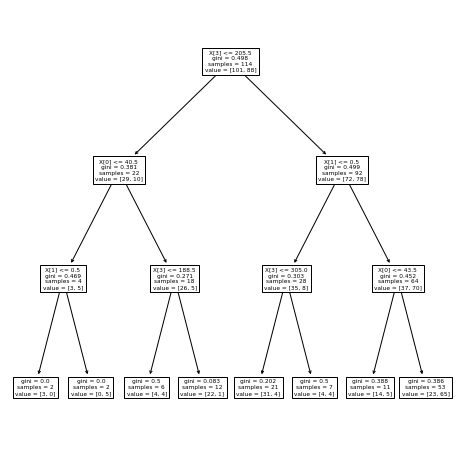

In [97]:
plt.figure(figsize=(8,8))
sklearn.tree.plot_tree(sample_tree)
plt.show()

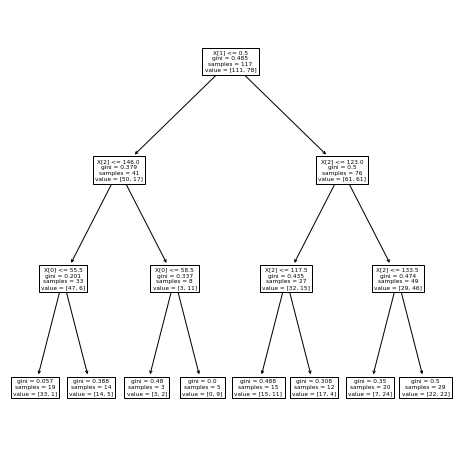

In [98]:
sample_tree = rf.estimators_[4]
plt.figure(figsize=(8,8))
sklearn.tree.plot_tree(sample_tree)
plt.show()

## OOB

In [99]:
# while creating random forest it reserves some data 
rf = RandomForestClassifier(max_depth=3,random_state=42,oob_score=True)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, oob_score=True, random_state=42)

In [100]:
# This is out of bag score for all the trees 
rf.oob_score_

0.6825396825396826

### Tuning hyperparamter of RandomForestClassifier

In [101]:
from sklearn.model_selection import GridSearchCV


In [102]:
rf = RandomForestClassifier(random_state=100,n_jobs=-1)


In [103]:
# create param for the grid required in the classifier 
params = {
    'max_depth' :[1,2,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'max_features':[2,3,4],
    'n_estimators':[10,30,50,100,200]
}

In [104]:
# Instantiate the Grid Search CV
gridSearch = GridSearchCV(
    estimator=rf ,
    param_grid=params,
    verbose=True,
    n_jobs=-1,
    scoring='accuracy',
    cv = 4
)

In [105]:
%%time 
gridSearch.fit(X_train,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 22.5 s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=True)

In [106]:
rf_best = gridSearch.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=100)

In [107]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [108]:
print(accuracy_score(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)

0.8253968253968254


array([[90, 15],
       [18, 66]], dtype=int64)

In [109]:
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

0.5925925925925926


array([[27, 18],
       [15, 21]], dtype=int64)

### Variable importance in RandomForestClassifier and Decision Trees

In [110]:
rf = RandomForestClassifier(max_depth=3,random_state=42,min_samples_leaf=10,n_jobs=-1,n_estimators=100)


In [111]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [117]:
imp_df = pd.DataFrame({
    'x':X_train.columns,
    'Imp':rf.feature_importances_
})
imp_df.sort_values(by='Imp',ascending=False)

,x,Imp
0,age,0.339413
1,sex,0.276492
3,cholestrol,0.196472
2,BP,0.187623
